# 信號與系統實習


## 實驗開始步驟：

### (1)前往 https://github.com/htygithub/SS_EXP 點選右下角按鈕 "Download Zip"
### (2)開啟 Lesson_3_FIR_fiter_and_frequency_response

## 實驗十二
### FIR濾波器的應用
### 執行以下程式碼並觀察輸出

In [5]:
!pip install matplotlib
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 25.8 MB 202 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


ECG samples: (2500,)
Sampling frequency: 250


Text(0.5, 0, 'Time [s]')

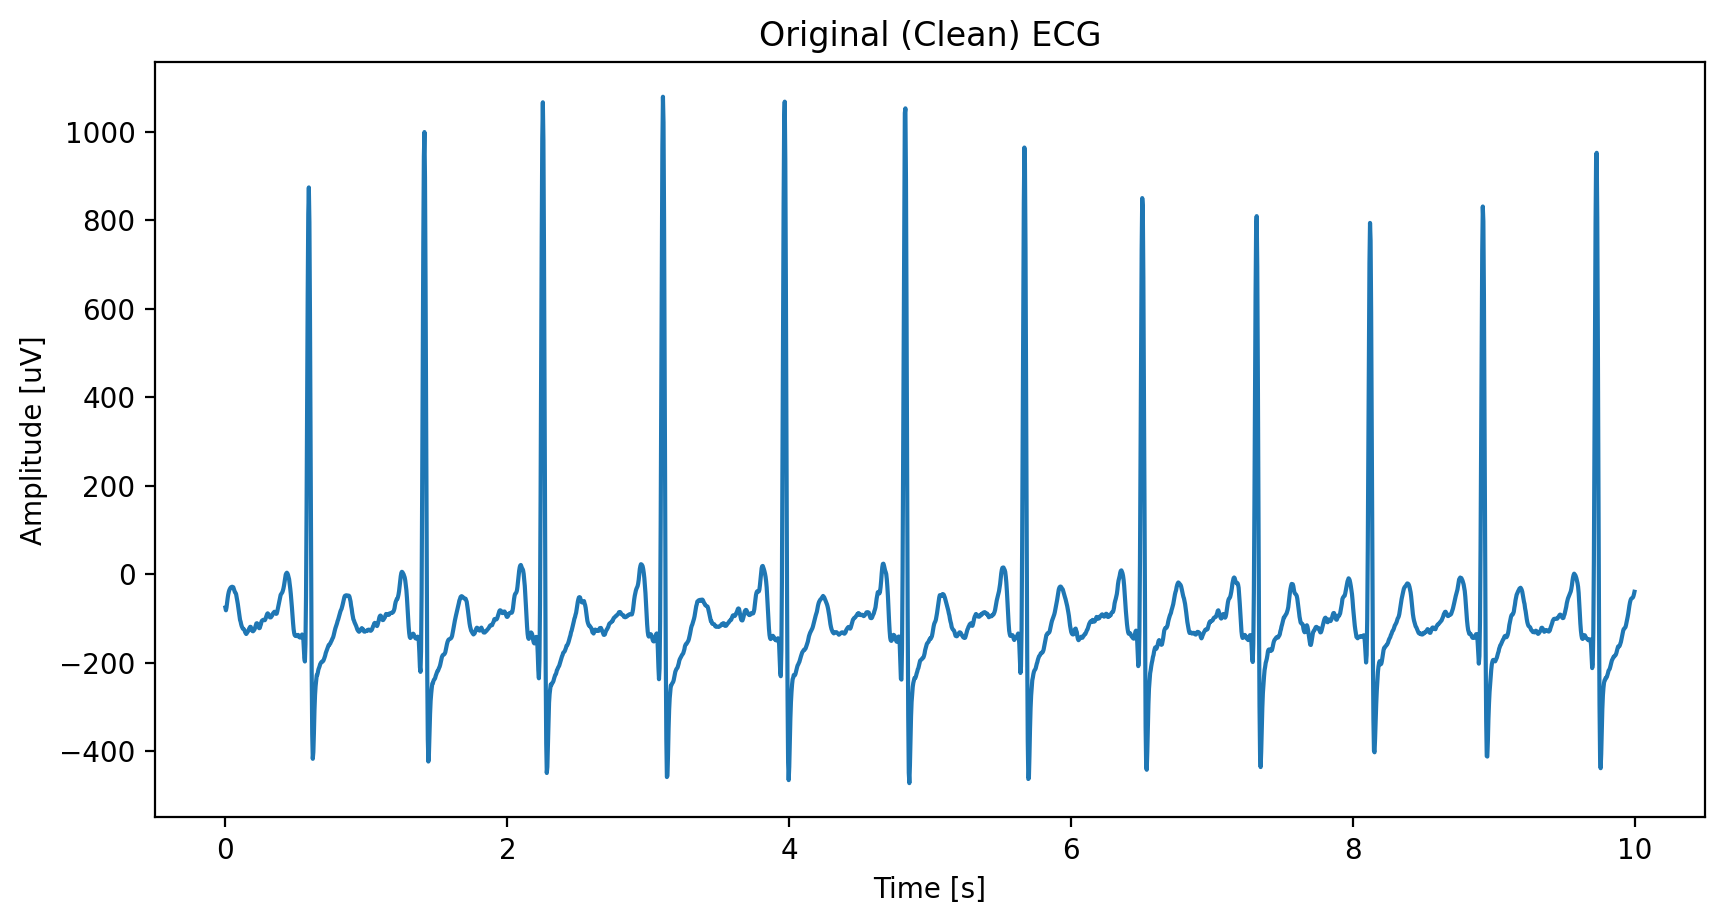

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]
print('ECG samples:', ecg.shape)
print('Sampling frequency:', fs)
t = np.arange(0, ecg.size/fs, 1/fs)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(t, ecg)
plt.title('Original (Clean) ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

## 問題十二
### 上圖為長度10秒之心電圖波形，用取樣頻率fs=250Hz 取樣，信號單位為uV
### <BR>(1) 參考實驗十一為將信號取快速傅利葉轉換, 繪製出信號頻譜，橫軸以類比頻率(Hz)來表示。

### <BR>(2) 產生一電力線偶合雜訊cos 波，Amplitude: 250uV, Phase: 0 rad, Frequency: 60 Hz，並繪製出受雜訊干擾之心電圖波形ecg_n

### <BR>(3) 繪製出受雜訊干擾的心電圖頻譜，橫軸以類比頻率(Hz)來表示。
    

Text(0.5, 1.0, 'The magnitude spectrum')

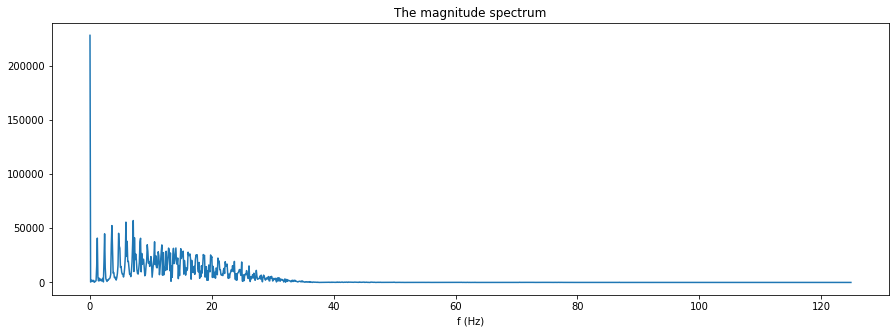

In [1]:
#問題十二(1)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

fs = 250
ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
ecgf = np.fft.fft(ecg)

#w_hat = np.arange(0, 2*np.pi, np.pi*2/fs)
#f = (w_hat/(2*np.pi))*fs

f = np.arange(0, fs, fs/ecg.size)

plt.figure(figsize=[15,5])
plt.plot(f[:int(len(ecgf)/2)], abs(ecgf)[:int(len(ecgf)/2)])  #f[:1250]
plt.xlabel(r'f (Hz)')
plt.title('The magnitude spectrum')

ECG samples: (2500,)
Sampling frequency: 250


Text(0.5, 0, 'Time [s]')

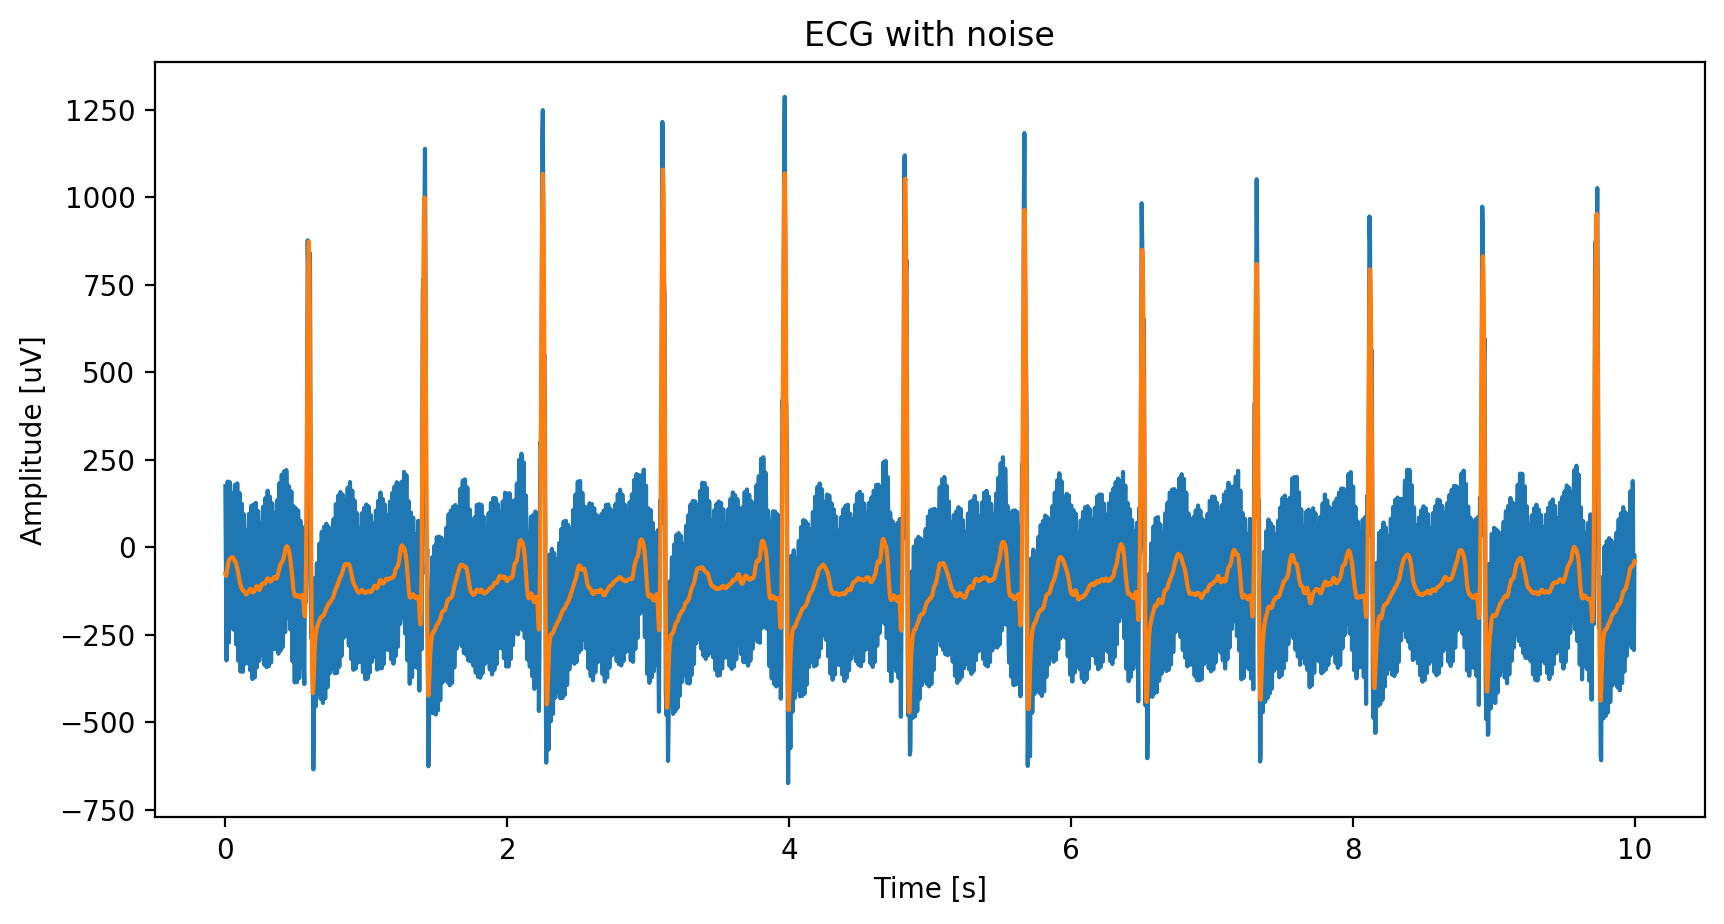

In [75]:
#問題十二(2)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]

t = np.arange(0, ecg.size/fs, 1/fs)
x = 250*np.cos(2*np.pi*60*t)



print('ECG samples:', ecg.shape)
print('Sampling frequency:', fs)
plt.figure(figsize=(10,5), dpi=200)
ecgn = ecg*0
ecgn = ecg+x

plt.plot(t, ecgn)
plt.plot(t, ecg)
plt.title('ECG with noise');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

1250


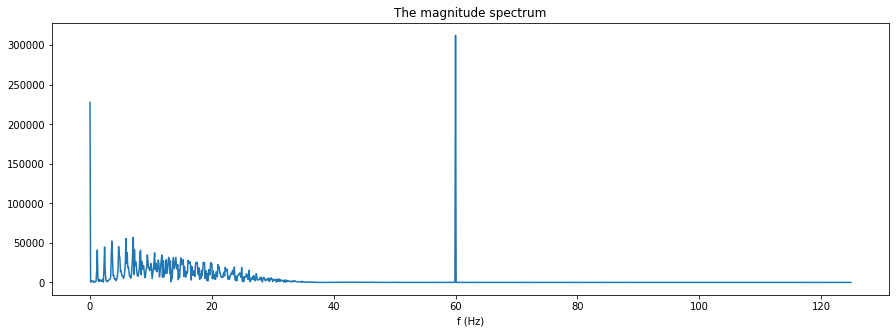

In [18]:
#問題十二(3)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]

t = np.arange(0, ecg.size/fs, 1/fs)
x = 250*np.cos(2*np.pi*60*t)
ecg += x
ecgf = np.fft.fft(ecg)

f = np.arange(0, fs, fs/ecg.size)

plt.figure(figsize=[15,5])
plt.plot(f[:int(len(ecgf)/2)], abs(ecgf)[:int(len(ecgf)/2)])
plt.xlabel(r'f (Hz)')
plt.title('The magnitude spectrum')



## 實驗十三
### 傅利葉以及反傅利葉
### 下圖之程式碼主要目的是將ecg轉換至頻率空間之後，將直流成份濾除後，再轉回時域
### 執行以下程式碼並觀察輸出

Text(0.5, 0, 'Time [s]')

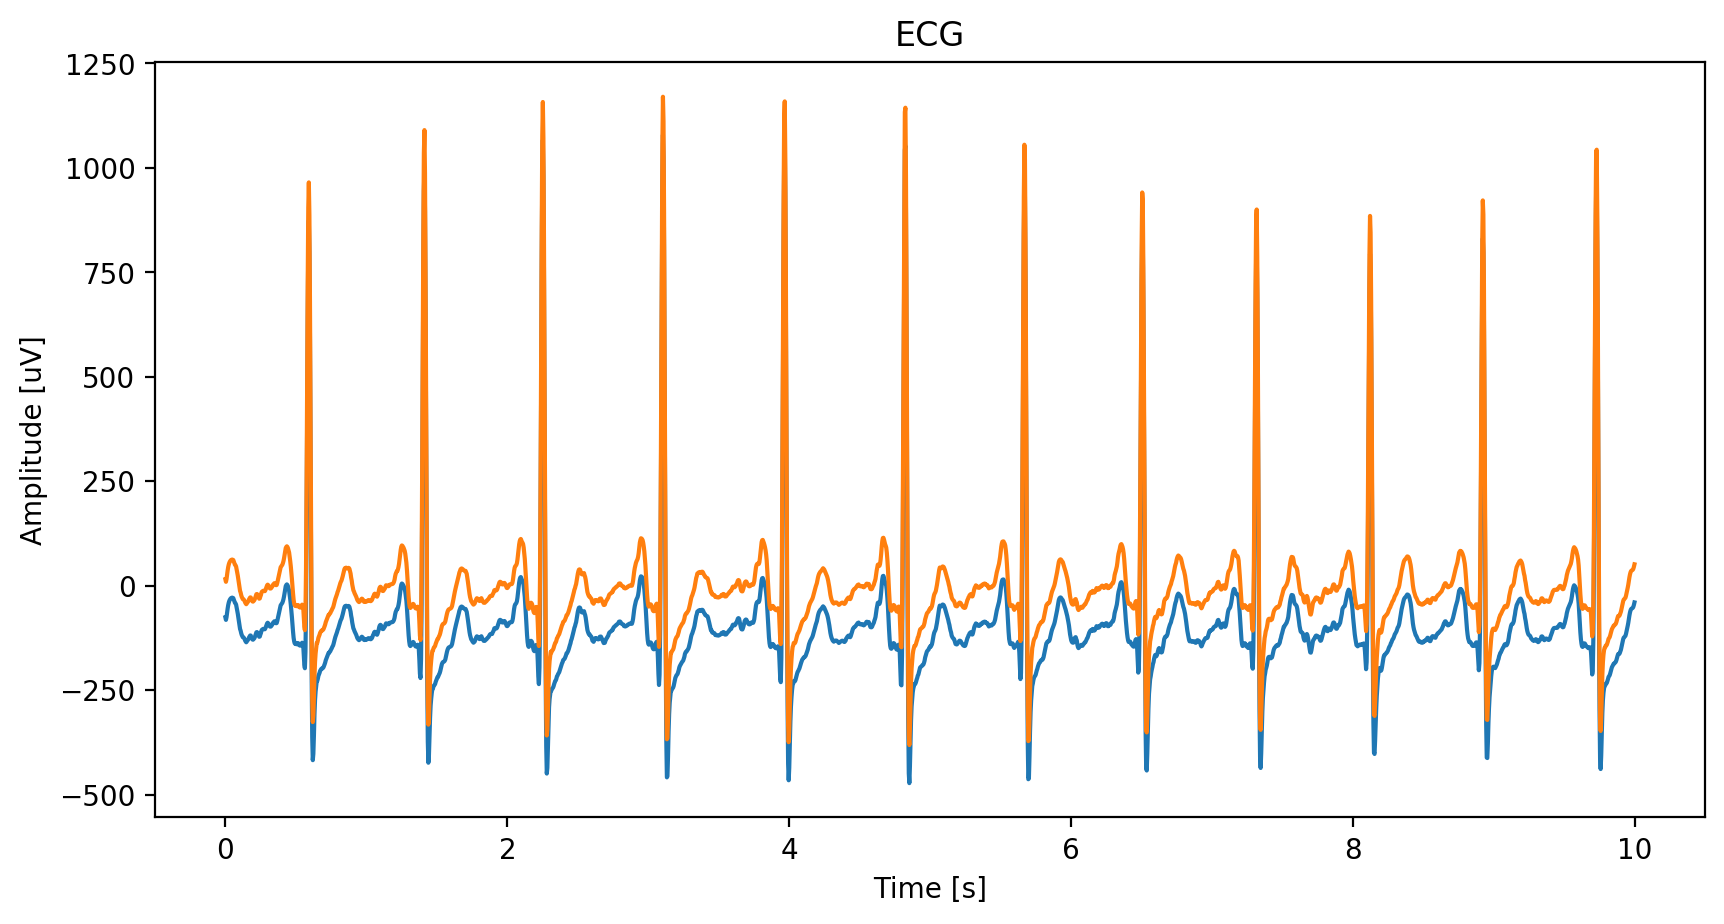

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]

xf = np.fft.fft(ecg)
xf[0] = 0
ecg2 = np.fft.ifft(xf)
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t, ecg)
plt.plot(t, ecg2)
plt.title('ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

## 問題十三

### <BR>(1) 參考實驗十三範例，先將受雜訊干擾之ecg_n，轉換至頻域後，將60Hz成份過濾掉再轉回時域，得到ecg_filtered。繪出ecg_filtered之時域及頻域信號

### <BR>(2) 參考實驗十一，設計一個三點平均濾波器 FIR filter, bk = [1/3, 1/3, 1/3] 並將ecg_n送入觀察結果

    

2500


Text(0.5, 1.0, 'The magnitude spectrum')

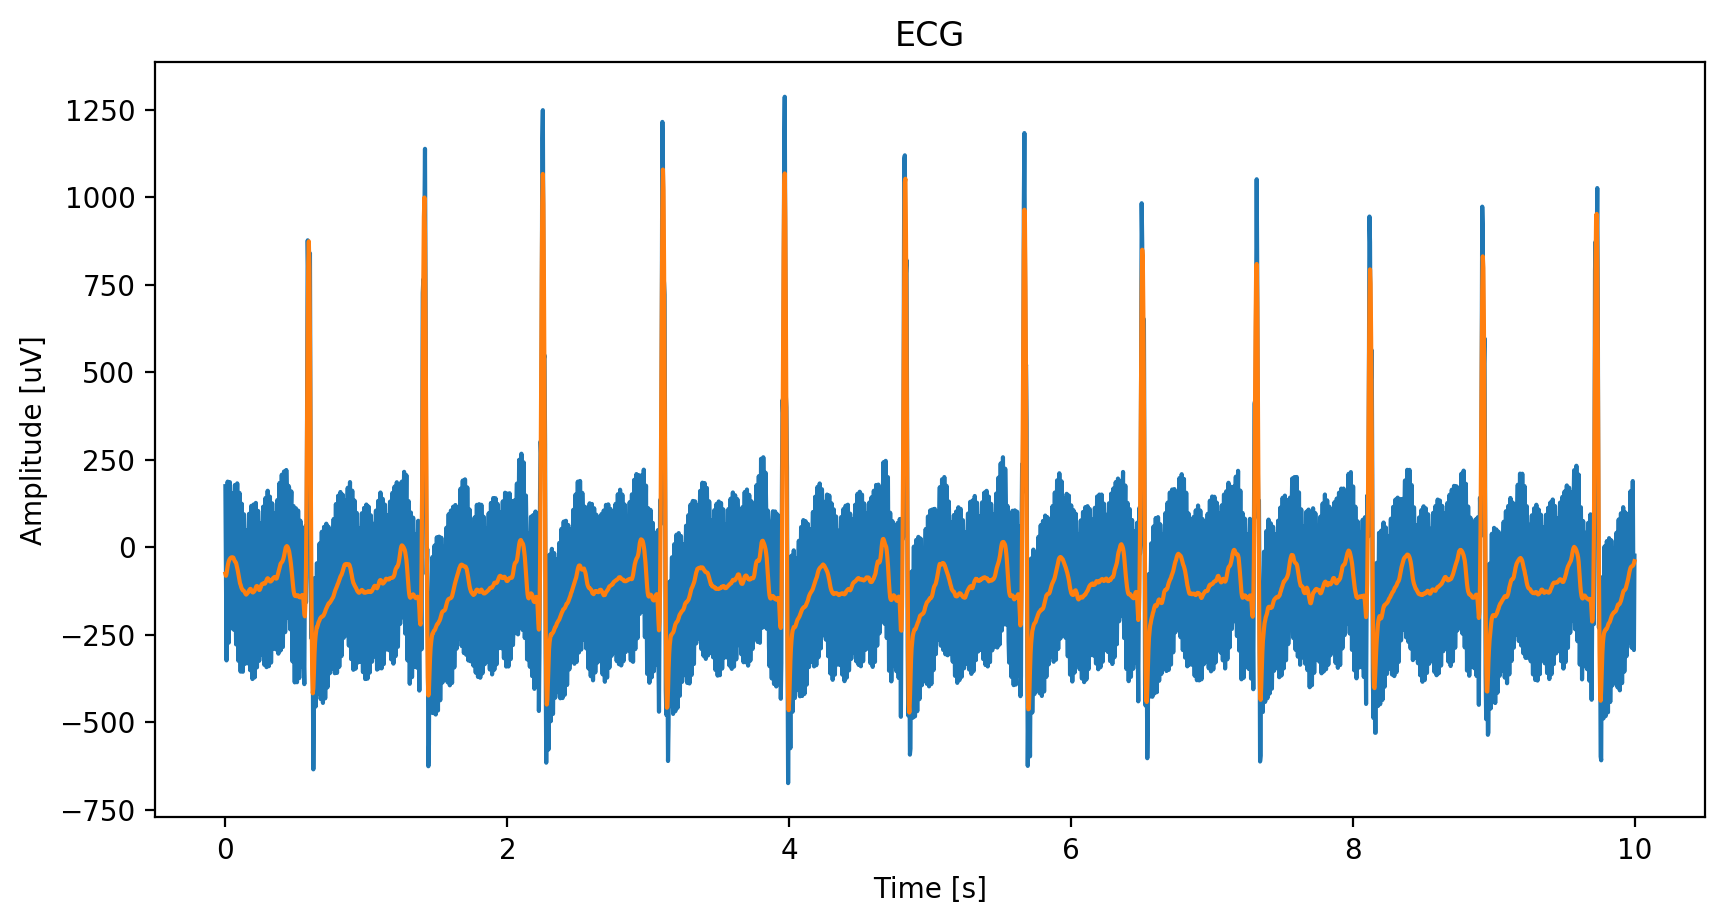

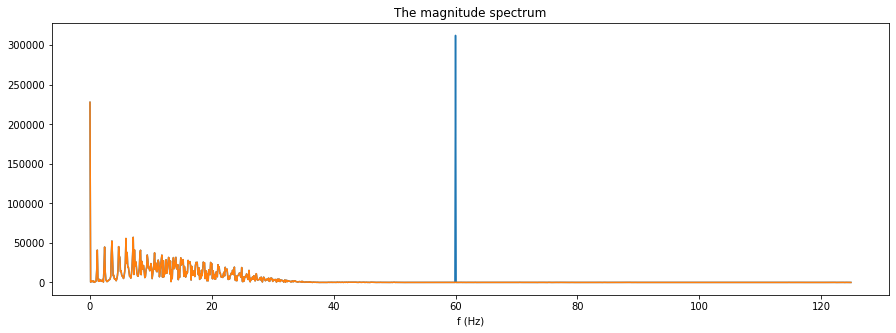

In [41]:
#問題十三(1)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]

t = np.arange(0, ecg.size/fs, 1/fs)
x = 250*np.cos(2*np.pi*60*t)
ecg += x
ecgf = np.fft.fft(ecg)

print(len(ecgf))

ecgf[600]=0
ecgf[1900]=0

ecg_filtered = np.fft.ifft(ecgf)
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t, ecg)
plt.plot(t, ecg_filtered)
plt.title('ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')


f = np.arange(0, fs, fs/ecg.size)

plt.figure(2, figsize=[15,5])
plt.plot(f[:int(len(xf)/2)], abs(xf)[:int(len(xf)/2)])
plt.plot(f[:int(len(ecgf)/2)], abs(ecgf)[:int(len(ecgf)/2)])
#plt.plot(f, abs(xf))
#plt.plot(f, abs(ecgf))
plt.xlabel(r'f (Hz)')
plt.title('The magnitude spectrum')

In [37]:
#問題十三(2)
%matplotlib inline
'''
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
t = np.arange(0, ecg.size/fs, 1/fs)
x = 250*np.cos(2*np.pi*60*t)
ecgn = ecg + x

xf = np.fft.fft(ecgn)

ecgf = xf*0;

ecgf[0] = 1/3*(xf[0])
ecgf[1] = 1/3*(xf[1] + xf[0])
            
for i in range(2, len(xf)):
    ecgf[i] = 1/3*(xf[i] + xf[i-1] + xf[i-2])

ecg3 = np.fft.ifft(ecgf)
plt.figure(1, figsize=(10, 5), dpi=200)
plt.plot(t, ecgn)
plt.plot(t, ecg3)
plt.plot(t, signal.lfilter([1/3, 1/3, 1/3], 1, ecgn))
plt.title('ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

f = np.arange(0, fs, fs/ecg.size)

plt.figure(2, figsize=[15,5])
plt.plot(f[:int(len(xf)/2)], abs(xf)[:int(len(xf)/2)])
plt.plot(f[:int(len(ecgf)/2)], abs(ecgf)[:int(len(ecgf)/2)])
plt.xlabel(r'f (Hz)')
plt.title('The magnitude spectrum')
'''

"\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom scipy.io import loadmat\n\necg_dict = loadmat('ecg.mat')\necg = ecg_dict['ecgOriginal'].flatten()\nt = np.arange(0, ecg.size/fs, 1/fs)\nx = 250*np.cos(2*np.pi*60*t)\necgn = ecg + x\n\nxf = np.fft.fft(ecgn)\n\necgf = xf*0;\n\necgf[0] = 1/3*(xf[0])\necgf[1] = 1/3*(xf[1] + xf[0])\n            \nfor i in range(2, len(xf)):\n    ecgf[i] = 1/3*(xf[i] + xf[i-1] + xf[i-2])\n\necg3 = np.fft.ifft(ecgf)\nplt.figure(1, figsize=(10, 5), dpi=200)\nplt.plot(t, ecgn)\nplt.plot(t, ecg3)\nplt.plot(t, signal.lfilter([1/3, 1/3, 1/3], 1, ecgn))\nplt.title('ECG');\nplt.ylabel(r'Amplitude [uV]')\nplt.xlabel('Time [s]')\n\nf = np.arange(0, fs, fs/ecg.size)\n\nplt.figure(2, figsize=[15,5])\nplt.plot(f[:int(len(xf)/2)], abs(xf)[:int(len(xf)/2)])\nplt.plot(f[:int(len(ecgf)/2)], abs(ecgf)[:int(len(ecgf)/2)])\nplt.xlabel(r'f (Hz)')\nplt.title('The magnitude spectrum')\n"

Text(0.5, 0, 'Time [s]')

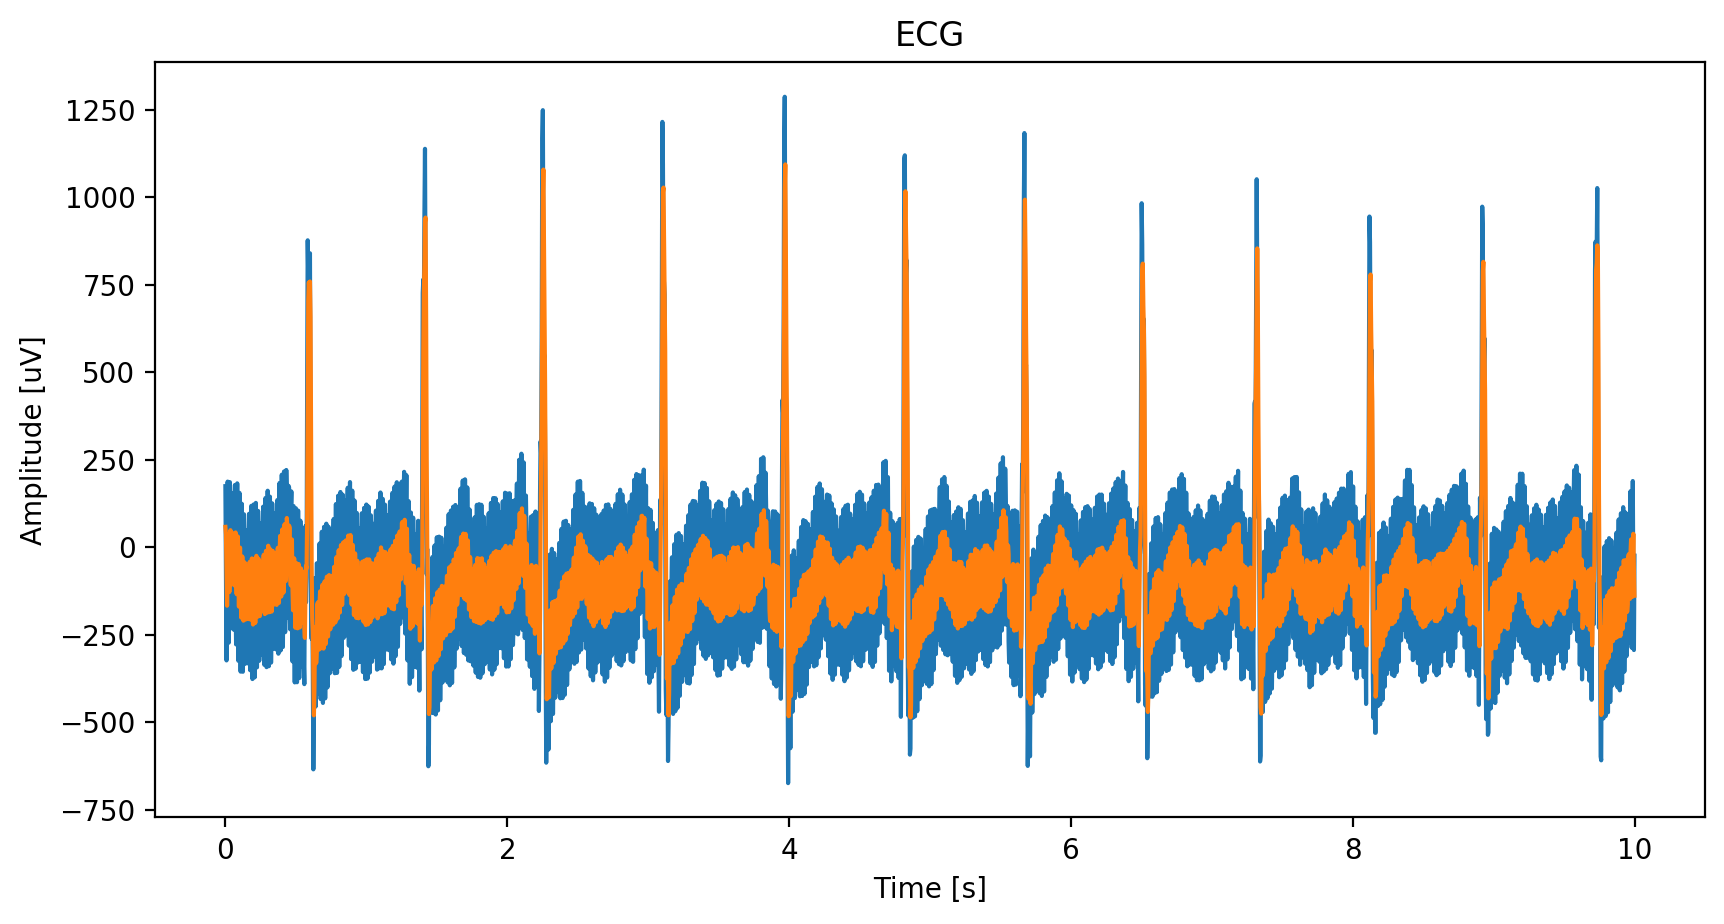

In [36]:
#問題十三(2)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
t = np.arange(0, ecg.size/fs, 1/fs)
x = 250*np.cos(2*np.pi*60*t)
ecgn = ecg + x


ecg3 = ecgn*0;

ecg3[0] = 1/3*(ecgn[0])
ecg3[1] = 1/3*(ecgn[1] + ecgn[0])
            
for i in range(2, len(ecgn)):
    ecg3[i] = 1/3*(ecgn[i] + ecgn[i-1] + ecgn[i-2])


plt.figure(1, figsize=(10, 5), dpi=200)
plt.plot(t, ecgn)
plt.plot(t, ecg3)
#plt.plot(t, signal.lfilter([1/3, 1/3, 1/3], 1, ecgn))
plt.title('ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')



## 實驗十四
### 頻率響應
### 下面程式用來觀察頻率為20Hz的信號，經過fs=250Hz 取樣，並送入3點平均濾波器後，振輻的改變。


Amplitude of x: 11.0
Amplitude of y: 10.917537786695938


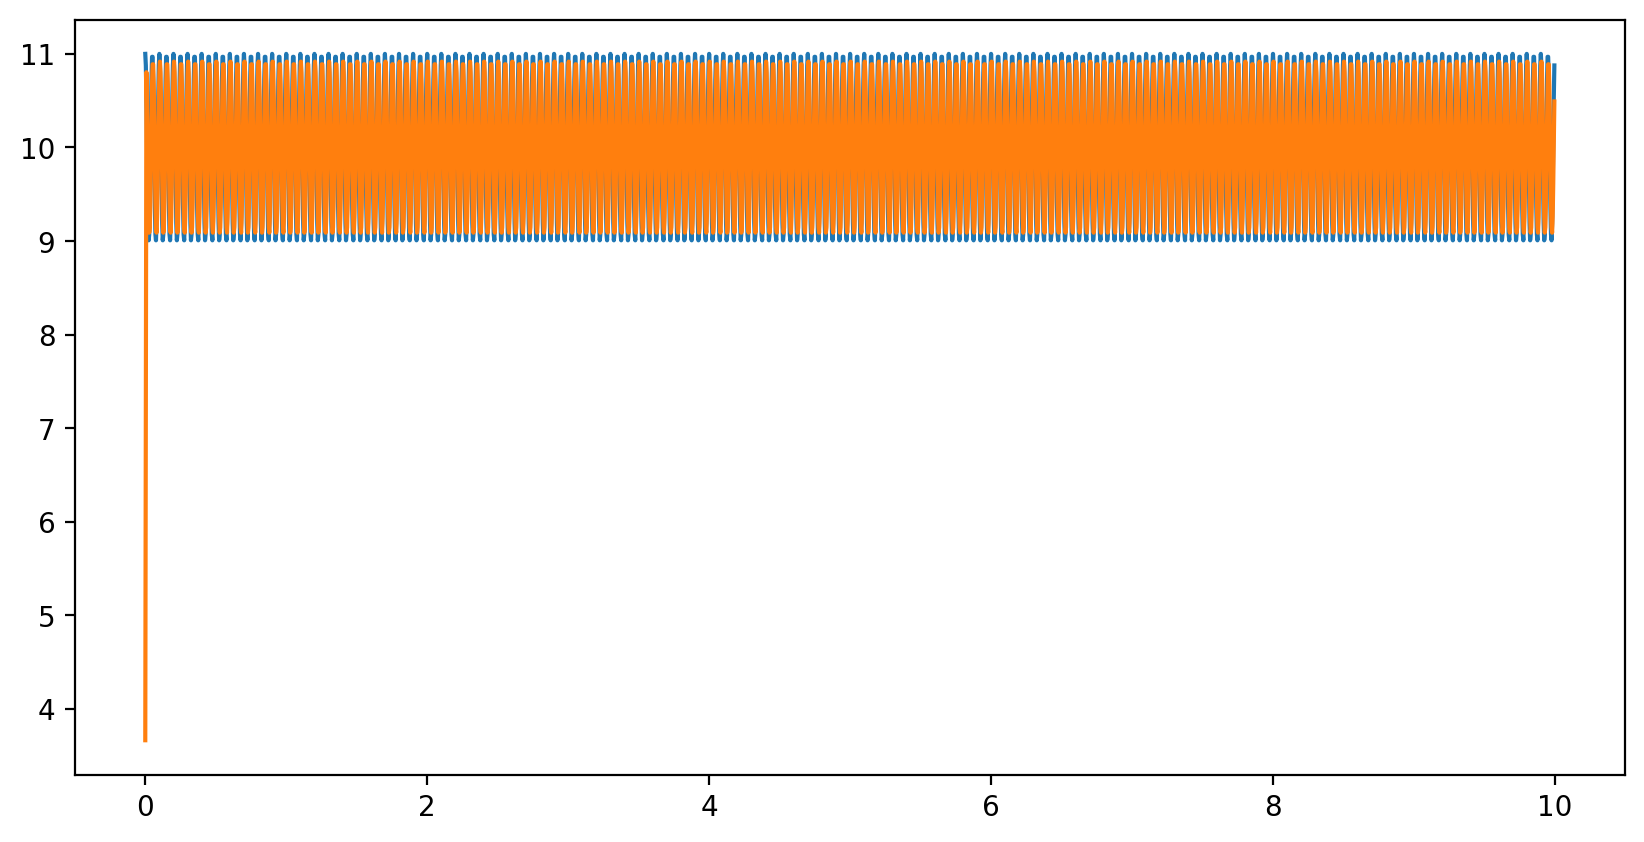

In [74]:
from scipy import signal
t = np.arange(0, ecg.size/fs, 1/fs)
x = np.cos(2*np.pi*20*t)
y = signal.lfilter([1/3, 1/3, 1/3], 1, x)

print('Amplitude of x:', np.max(x))
print('Amplitude of y:',np.max(y))
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t, x)
plt.plot(t, y)


## 問題十四

### <BR>(1) 使用max來觀察弦波的振輻永遠正確嗎？
    
### <BR>(2) 改變輸入信號x之頻率由 0, 1, 2 ... 125Hz，觀察三點平均濾波器之輸出，並繪製出此FIR濾波器之等效頻率響應圖，橫軸為類比頻率(Hz)，縱軸為FIR filter之放大倍率。

### <BR>(3) 將FIR 改為 bk = [1/4, -2/4, 1/4] 並觀察其頻率響應。請問此FIR濾波器為高通或是低通濾波器。
    

In [86]:
#問題十四(1)
No
振幅是在波動或振動中距離平衡位置或靜止位置的最大位移，max量測為波型最大值，若一波型準位不在0，無法正確測得振幅

1.0
0.9175377866959373


Text(0.5, 0, 'Frequency [Hz]')

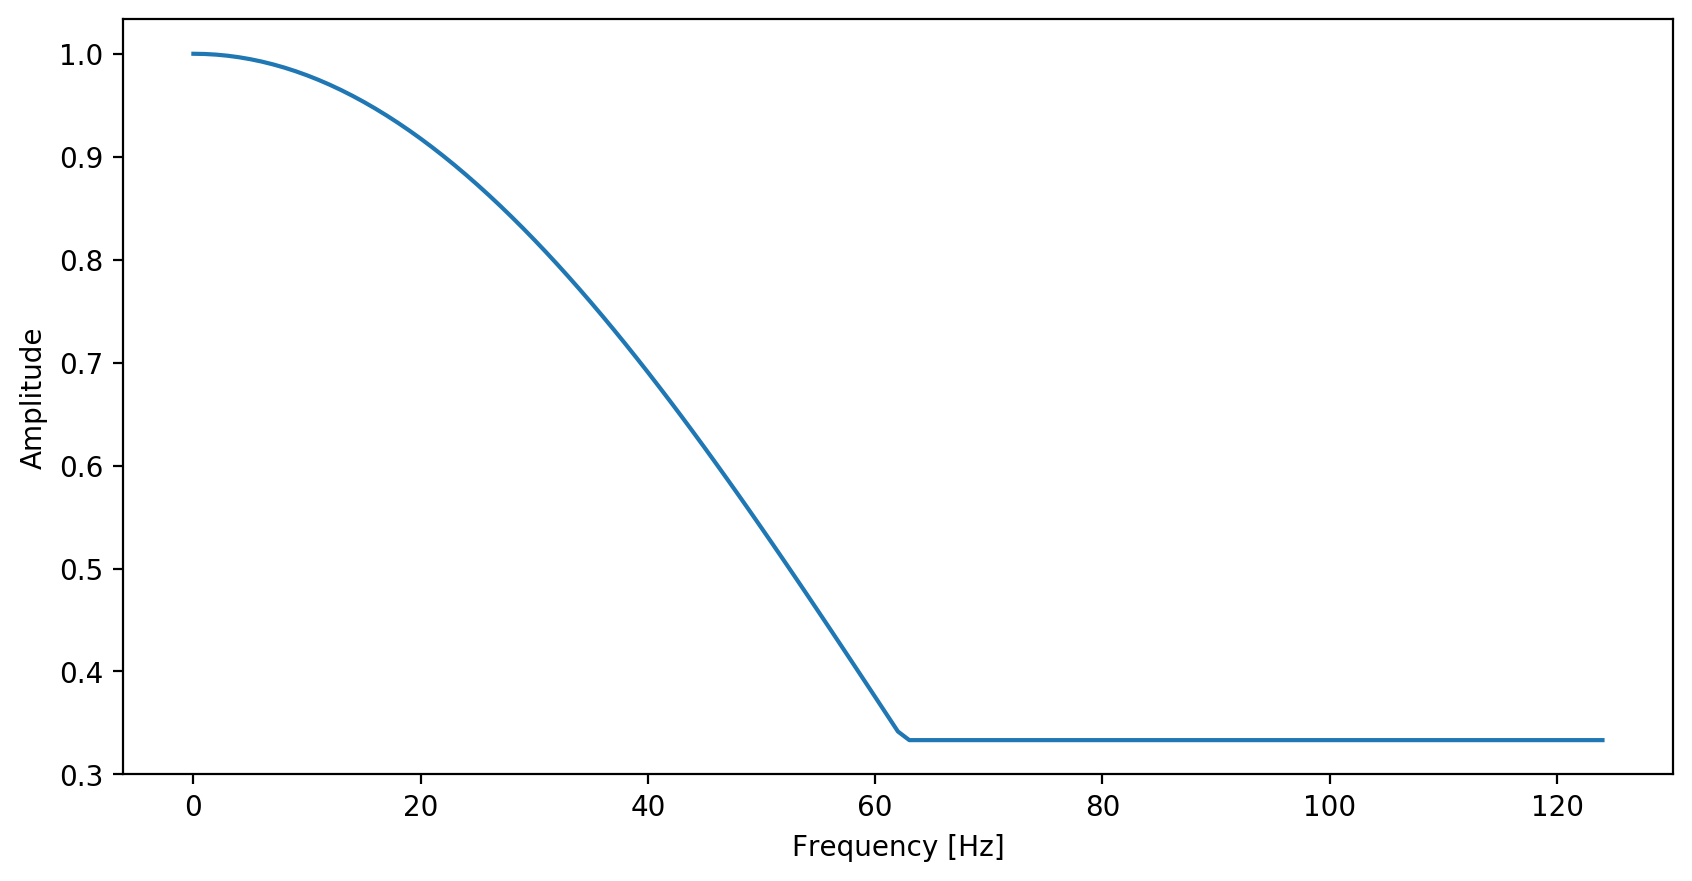

In [69]:
#問題十四(2)
from scipy import signal
t = np.arange(0, ecg.size/fs, 1/fs)

freq = np.arange(0, 125,1)
peak_v = []

for i in freq:
    x = np.cos(2*np.pi*i*t)
    y = signal.lfilter([1/3, 1/3, 1/3], 1, x)
    peak_v.append(max(y))

plt.figure(figsize=(10, 5), dpi=200)
plt.plot(freq, peak_v)
plt.ylabel(r'Amplitude')
plt.xlabel('Frequency [Hz]')

Amplitude of x: 1.0
Amplitude of y: 0.7317627457816697


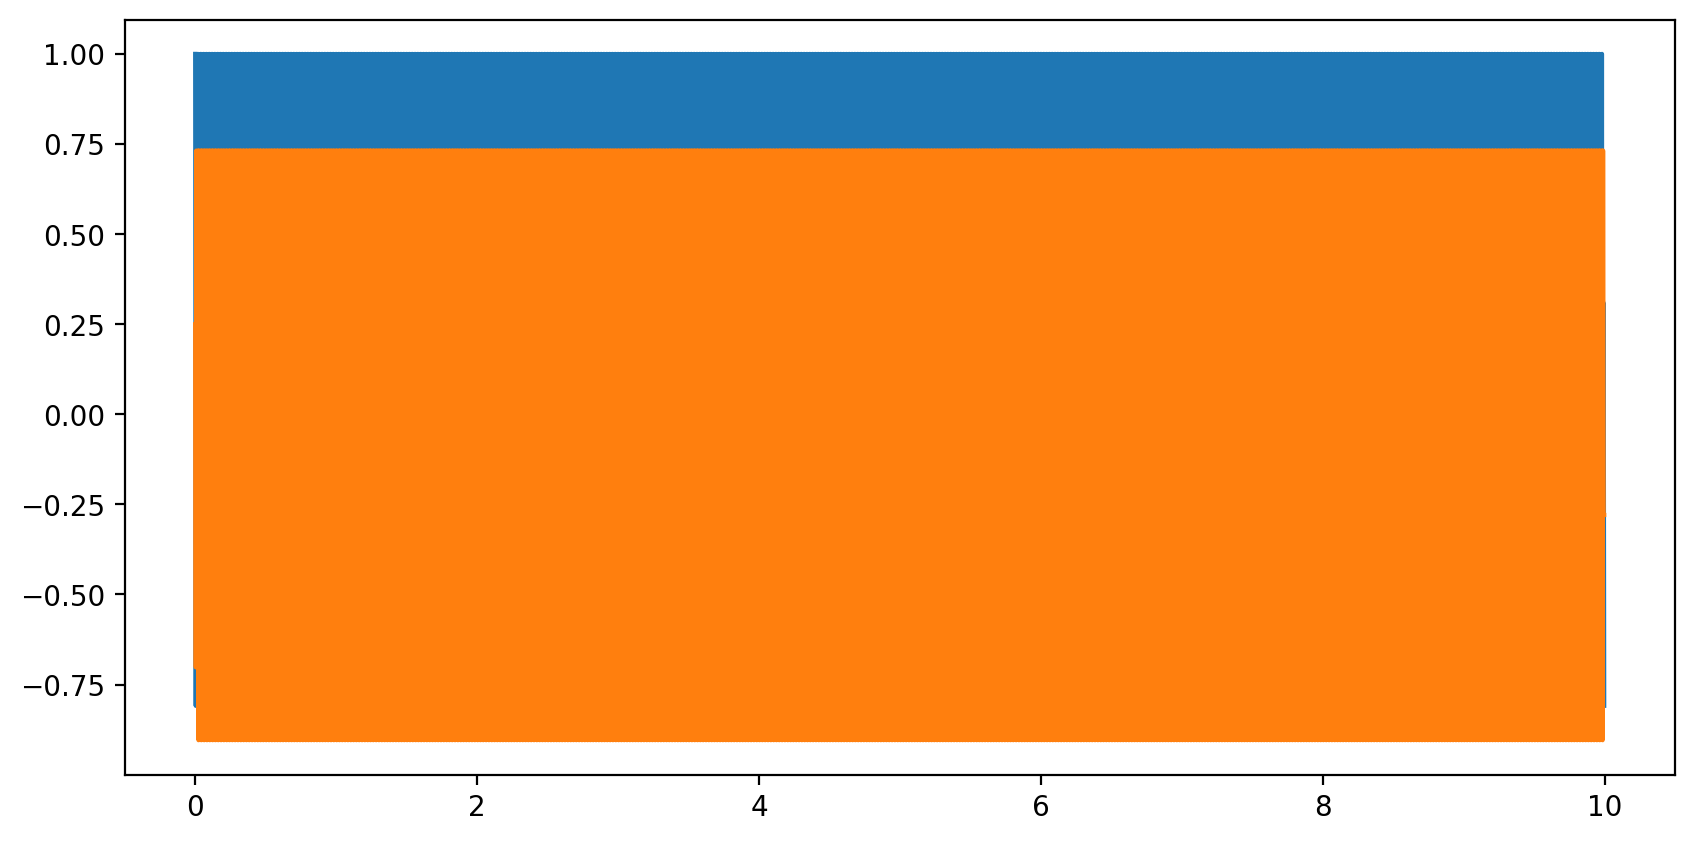

In [62]:
#問題十四(3)
from scipy import signal
t = np.arange(0, ecg.size/fs, 1/fs)
x = np.cos(2*np.pi*100*t)
y = signal.lfilter([1/4, -2/4, 1/4], 1, x)

print('Amplitude of x:', np.max(x))
print('Amplitude of y:',np.max(y))
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t, x)
plt.plot(t, y)


Text(0.5, 0, 'Frequency [Hz]')

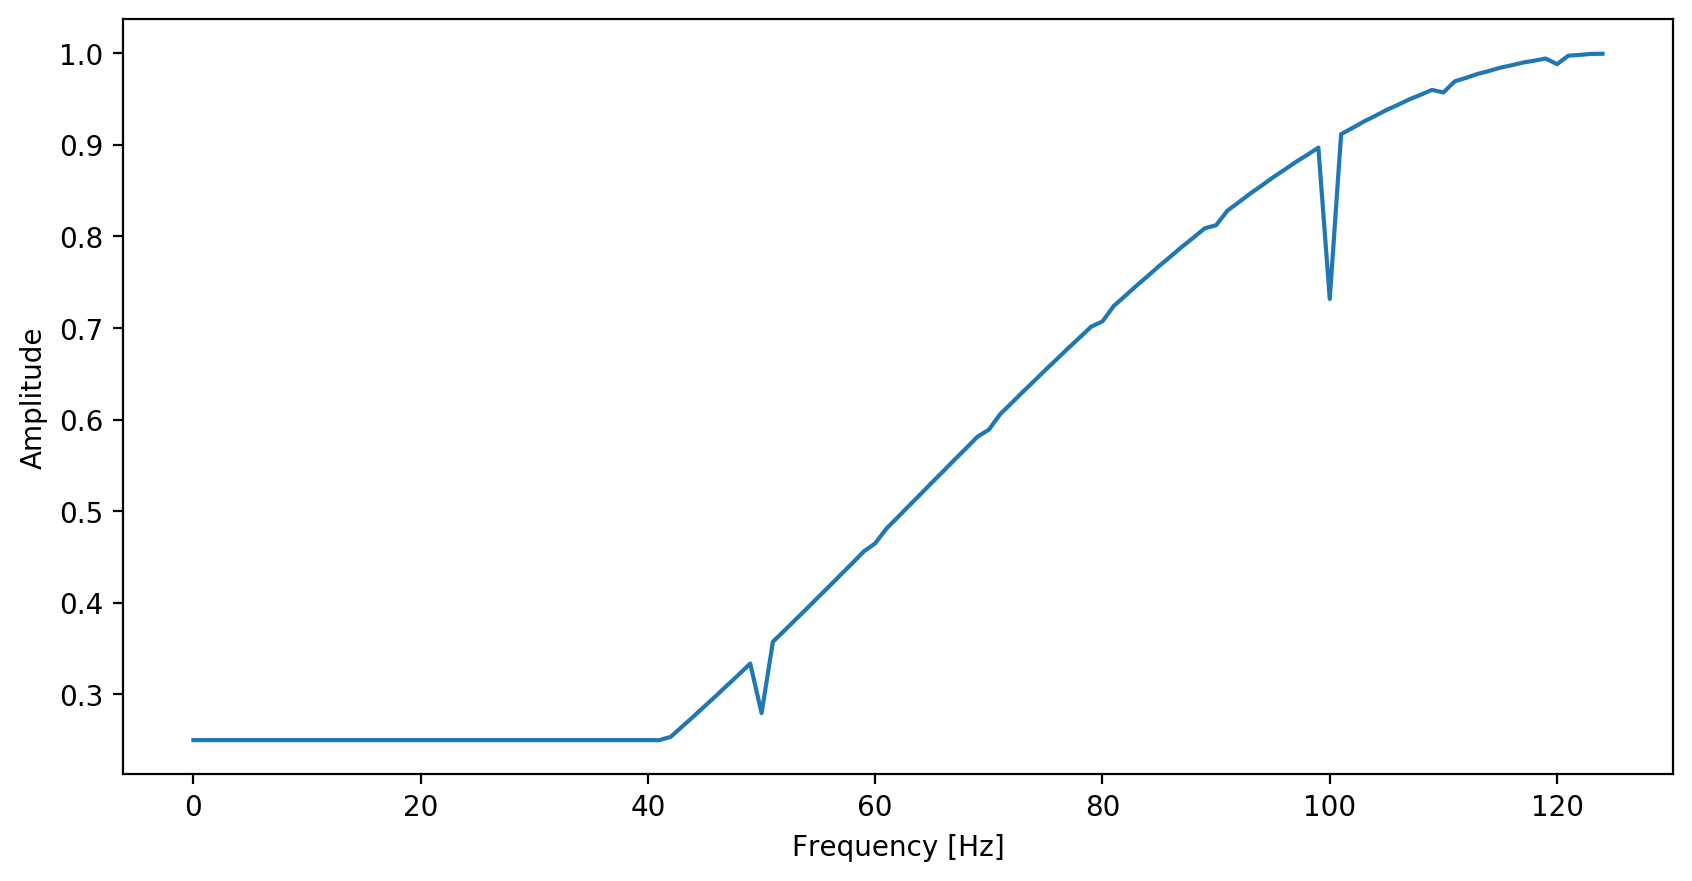

In [67]:
#問題十四(2)
from scipy import signal
t = np.arange(0, ecg.size/fs, 1/fs)

freq = np.arange(0, 125,1)
peak_v = []

for i in freq:
    x = np.cos(2*np.pi*i*t)
    y = signal.lfilter([1/4, -2/4, 1/4], 1, x)
    peak_v.append(max(y))
    #print(str(i)+' '+str(max(y)))
    
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(freq, peak_v)
plt.ylabel(r'Amplitude')
plt.xlabel('Frequency [Hz]')

In [ ]:
#高通濾波器